<a href="https://colab.research.google.com/github/MelodyBorg/b2b-subscription-optimizer/blob/main/Subscription_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

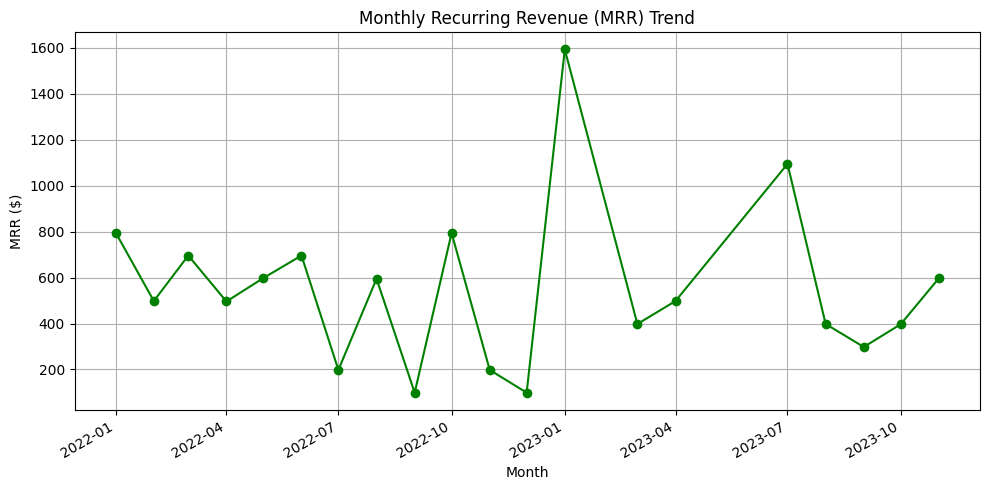

## 📊 B2B SaaS Analytics Dashboard

**Tracking performance of a subscription-based product using core SaaS metrics**

### 🔹 Key Metrics

- 💰 **Monthly Recurring Revenue (MRR):** `$11,037.00`

- 📉 **Churn Rate (Mar 2024):** `1.00%`

- 🧾 **Lifetime Value (LTV):** `$188.00`

### 📈 MRR Trend Over Time

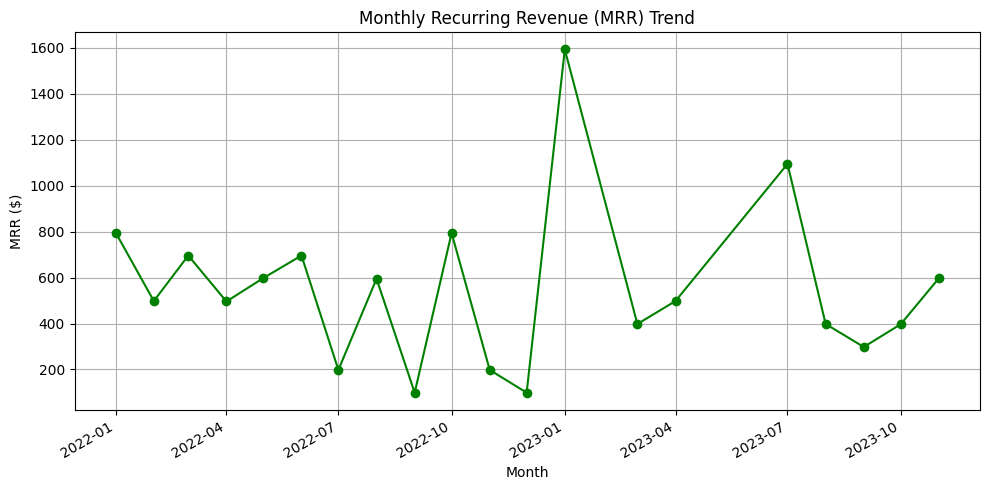

In [ ]:
# 📊 B2B SaaS Analytics Dashboard
#A simulated product analytics dashboard built with Python to analyze subscription business performance.

## 1. Generate Mock Subscription Data start/cancel dates, plan types, and monthly revenue

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for consistency
random.seed(42)

# Generate mock data
num_customers = 100
start_dates = [datetime(2022, 1, 1) + timedelta(days=random.randint(0, 700)) for _ in range(num_customers)]
plans = ['Basic', 'Pro', 'Plus']
monthly_prices = {'Basic': 99, 'Plus': 199, 'Pro': 299}

data = []

for i in range(num_customers):
    plan = random.choice(plans)
    start = start_dates[i]
    cancel_chance = random.random()
    cancel_date = None

    if cancel_chance < 0.4:  # 40% churn rate
        cancel_date = start + timedelta(days=random.randint(60, 365))
        if cancel_date > datetime.today():
            cancel_date = None

    revenue = monthly_prices[plan]
    data.append([i + 1001, start.date(), cancel_date.date() if cancel_date else '', revenue, plan])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['customer_id', 'start_date', 'cancel_date', 'revenue', 'plan'])

# Show the first few rows
df.head()

## SaaS Metrics Functions

# Convert date columns to datetime for processing
df['start_date'] = pd.to_datetime(df['start_date'])
df['cancel_date'] = pd.to_datetime(df['cancel_date'], errors='coerce')

# --- 1. Monthly Recurring Revenue (MRR) - Total revenue from active subscribers right now
def calculate_mrr(data):
    active = data[data['cancel_date'].isna()]
    return active['revenue'].sum()

# --- 2. Churn Rate for a specific month (Period object) - % of users who left in a given month

def calculate_churn_rate(data, reference_month):
    data['start_month'] = data['start_date'].dt.to_period('M')
    data['cancel_month'] = data['cancel_date'].dt.to_period('M')

    joined = data[data['start_month'] < reference_month]
    churned = joined[joined['cancel_month'] == reference_month]

    return len(churned) / len(joined) if len(joined) > 0 else 0

# --- 3. Lifetime Value (LTV) - Revenue per user over lifespan
def calculate_ltv(data):
    return data['revenue'].mean() * data['revenue'].count() / data['customer_id'].nunique()

import matplotlib.pyplot as plt

def plot_mrr_trend(data):
    data['start_month'] = data['start_date'].dt.to_period('M')
    active_subs = data[data['cancel_date'].isna()]
    mrr_trend = active_subs.groupby('start_month')['revenue'].sum()
    mrr_trend.index = mrr_trend.index.to_timestamp()

    if mrr_trend.empty:
        print("No data to display.")
        return

    fig, ax = plt.subplots(figsize=(10, 5))
    mrr_trend.plot(ax=ax, marker='o', color='green')
    ax.set_title("Monthly Recurring Revenue (MRR) Trend")
    ax.set_xlabel("Month")
    ax.set_ylabel("MRR ($)")
    ax.grid(True)
    plt.tight_layout()
    plt.show()
plot_mrr_trend(df)

#Simulated Dashboard Output
from IPython.display import display, Markdown

# Simulated header
display(Markdown("## 📊 B2B SaaS Analytics Dashboard"))
display(Markdown("**Tracking performance of a subscription-based product using core SaaS metrics**"))

# Display metrics
display(Markdown("### 🔹 Key Metrics"))

display(Markdown(f"- 💰 **Monthly Recurring Revenue (MRR):** `${mrr:,.2f}`"))
display(Markdown(f"- 📉 **Churn Rate (Mar 2024):** `{churn:.2%}`"))
display(Markdown(f"- 🧾 **Lifetime Value (LTV):** `${ltv:,.2f}`"))

# Add chart
display(Markdown("### 📈 MRR Trend Over Time"))
plot_mrr_trend(df)